In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import os
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor
import matplotlib
matplotlib.rcParams['font.family'] = 'Helvetica'

In [52]:
df_structures = pd.read_excel('count_fcc_fractions_byPalette.xlsx')
df_properties = pd.read_excel(
    'v6_Fe_Cr_Ni_Co_V_SSS_FCC_byCompo_wt_pct_ML_fcc_edit.xlsx')

df_structures_Gmin_sort = df_structures.sort_values(
    by='Gmin_FCC_fraction', ascending=False)
df_structures_Gmineq_sort = df_structures.sort_values(
    by='Gmin_eq_FCC_fraction', ascending=False)


# df_properties_SSSsort =


display(df_structures_Gmin_sort.head(2))
display(df_structures_Gmineq_sort.head(2))

display(df_properties.head(2))

,ABCDE,Gmin_FCC_fraction,eq_FCC_fraction,Gmin_eq_FCC_fraction,Unnamed: 4
62,Ni-Cr-Co-V-Fe,73.913043,49.275362,47.826087,x
97,Fe-V-Co-Cr-Ni,71.014493,36.231884,36.231884,NaN


,ABCDE,Gmin_FCC_fraction,eq_FCC_fraction,Gmin_eq_FCC_fraction,Unnamed: 4
111,Fe-Ni-Co-Cr-V,59.420290,50.724638,50.724638,NaN
110,Fe-Ni-Co-V-Cr,57.971014,55.072464,50.724638,NaN


,Unnamed: 0.1,Unnamed: 0,Fe,Cr,Ni,Co,V,ShearModulus_eff,PoissonsRatio_eff,delta_prime_misfit,...,sigma_SSS_FCC,compo_A_B_C_D_E,H1_new_pred_KFold_mean,H1_new_pred_KFold_std,C2_new_pred_KFold_mean,C2_new_pred_KFold_std,H1_new_pred_KFold_mean_FCC,H1_new_pred_KFold_std_FCC,C2_new_pred_KFold_mean_FCC,C2_new_pred_KFold_std_FCC
0,0,0,34.167395,2.891940,5.441344,13.111107,44.388214,63.740744,0.329844,0.092273,...,NaN,V-Co-Ni-Cr-Fe,501.462250,121.009743,299.628906,225.678894,NaN,NaN,NaN,NaN
1,1,1,40.204113,4.798947,5.417690,11.966268,37.612981,66.837689,0.322980,0.091240,...,NaN,V-Co-Ni-Cr-Fe,492.357391,119.546692,312.933289,225.030975,NaN,NaN,NaN,NaN


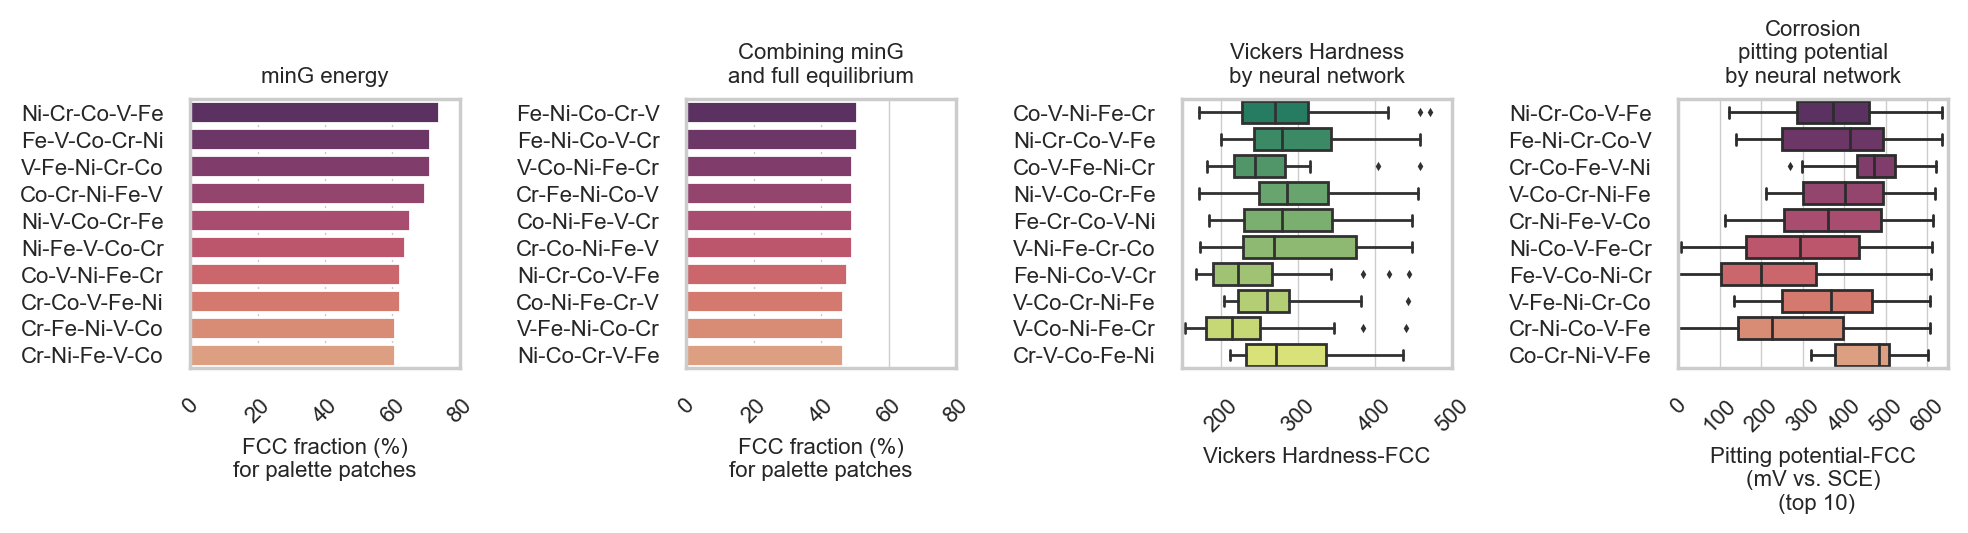

In [94]:
# Set the width and height of your figure


# Assuming df_structures_Gmin_sort and df_structures_Gmineq_sort are defined earlier in your code and have the method .head() applied to them correctly

# Set the theme once
sns.set_theme(style="whitegrid", rc={"axes.grid": True, "grid.linewidth": 0.5})

# Create subplots with correct dpi setting
fig, axs = plt.subplots(ncols=4, figsize=(10, 4), dpi=200)

font_size = 8

# Plot for the first subplot
sns.barplot(y='ABCDE', x='Gmin_FCC_fraction', data=df_structures_Gmin_sort.head(
    10), linewidth=1, ax=axs[0], palette="flare_r")
axs[0].set_title("minG energy", fontsize=font_size)
axs[0].set_xlabel('FCC fraction (%)\nfor palette patches', fontsize=font_size)
axs[0].set_ylabel('')
axs[0].set_xlim([0, 80])
axs[0].set_xticks(range(0, 81, 20))  # Fixed the range here
axs[0].tick_params(axis='x', rotation=45)
axs[0].tick_params(axis='both', labelsize=font_size)
axs[0].set_box_aspect(1)


# Plot for the second subplot (assuming df_structures_Gmineq_sort is correctly defined)
sns.barplot(y='ABCDE', x='Gmin_eq_FCC_fraction', data=df_structures_Gmineq_sort.head(
    10), linewidth=1, ax=axs[1], palette="flare_r")
axs[1].set_title("Combining minG\nand full equilibrium",
                 fontsize=font_size)
axs[1].set_xlabel('FCC fraction (%)\nfor palette patches',
                  fontsize=font_size)
axs[1].set_ylabel('')
axs[1].set_xlim([0, 80])
axs[1].set_xticks(range(0, 81, 20))  # Fixed the range here
axs[1].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='both', labelsize=font_size)
axs[1].set_box_aspect(1)


H1_max_values = df_properties.groupby('compo_A_B_C_D_E')[
    'H1_new_pred_KFold_mean_FCC'].max()
H1_sorted_groups = H1_max_values.sort_values(ascending=False).head(10).index
sns.boxplot(x="H1_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", data=df_properties,
            linewidth=1, fliersize=1, palette="summer", order=H1_sorted_groups, ax=axs[2])
axs[2].set_title('Vickers Hardness\nby neural network', fontsize=font_size)
axs[2].set_xlabel('Vickers Hardness-FCC', fontsize=font_size)
axs[2].set_ylabel(None)
# axs[2].set_yticklabels([])
axs[2].set_xticks(range(0, 501, 100))
axs[2].set_xlim([150, 500])
axs[2].tick_params(axis='x', rotation=45)
axs[2].tick_params(axis='both', labelsize=font_size)
axs[2].set_box_aspect(1)


C2_max_values = df_properties.groupby('compo_A_B_C_D_E')[
    'C2_new_pred_KFold_mean_FCC'].max()
C2_sorted_groups = C2_max_values.sort_values(ascending=False).head(10).index
sns.boxplot(x="C2_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", data=df_properties,
            linewidth=1, fliersize=1, palette="flare_r", order=C2_sorted_groups, ax=axs[3])
axs[3].set_title(
    'Corrosion pitting potential\nby neural network\n(top 10)', fontsize=font_size)
axs[3].set_xlabel('Pitting potential-FCC\n(mV vs. SCE)',
                  fontsize=font_size)
axs[3].set_ylabel(None)
axs[3].set_xticks(range(0, 801, 100))
axs[3].set_xlim([0, 650])
axs[3].tick_params(axis='x', rotation=45)
axs[3].tick_params(axis='both', labelsize=font_size)
axs[3].set_box_aspect(1)


# sns.boxplot(x="sigma_SSS_FCC", y="compo_A_B_C_D_E", data=df_properties, linewidth=1, fliersize=1, ax=axs[2], palette="summer")


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

<Axes: xlabel='C2_new_pred_KFold_mean_FCC', ylabel='compo_A_B_C_D_E'>

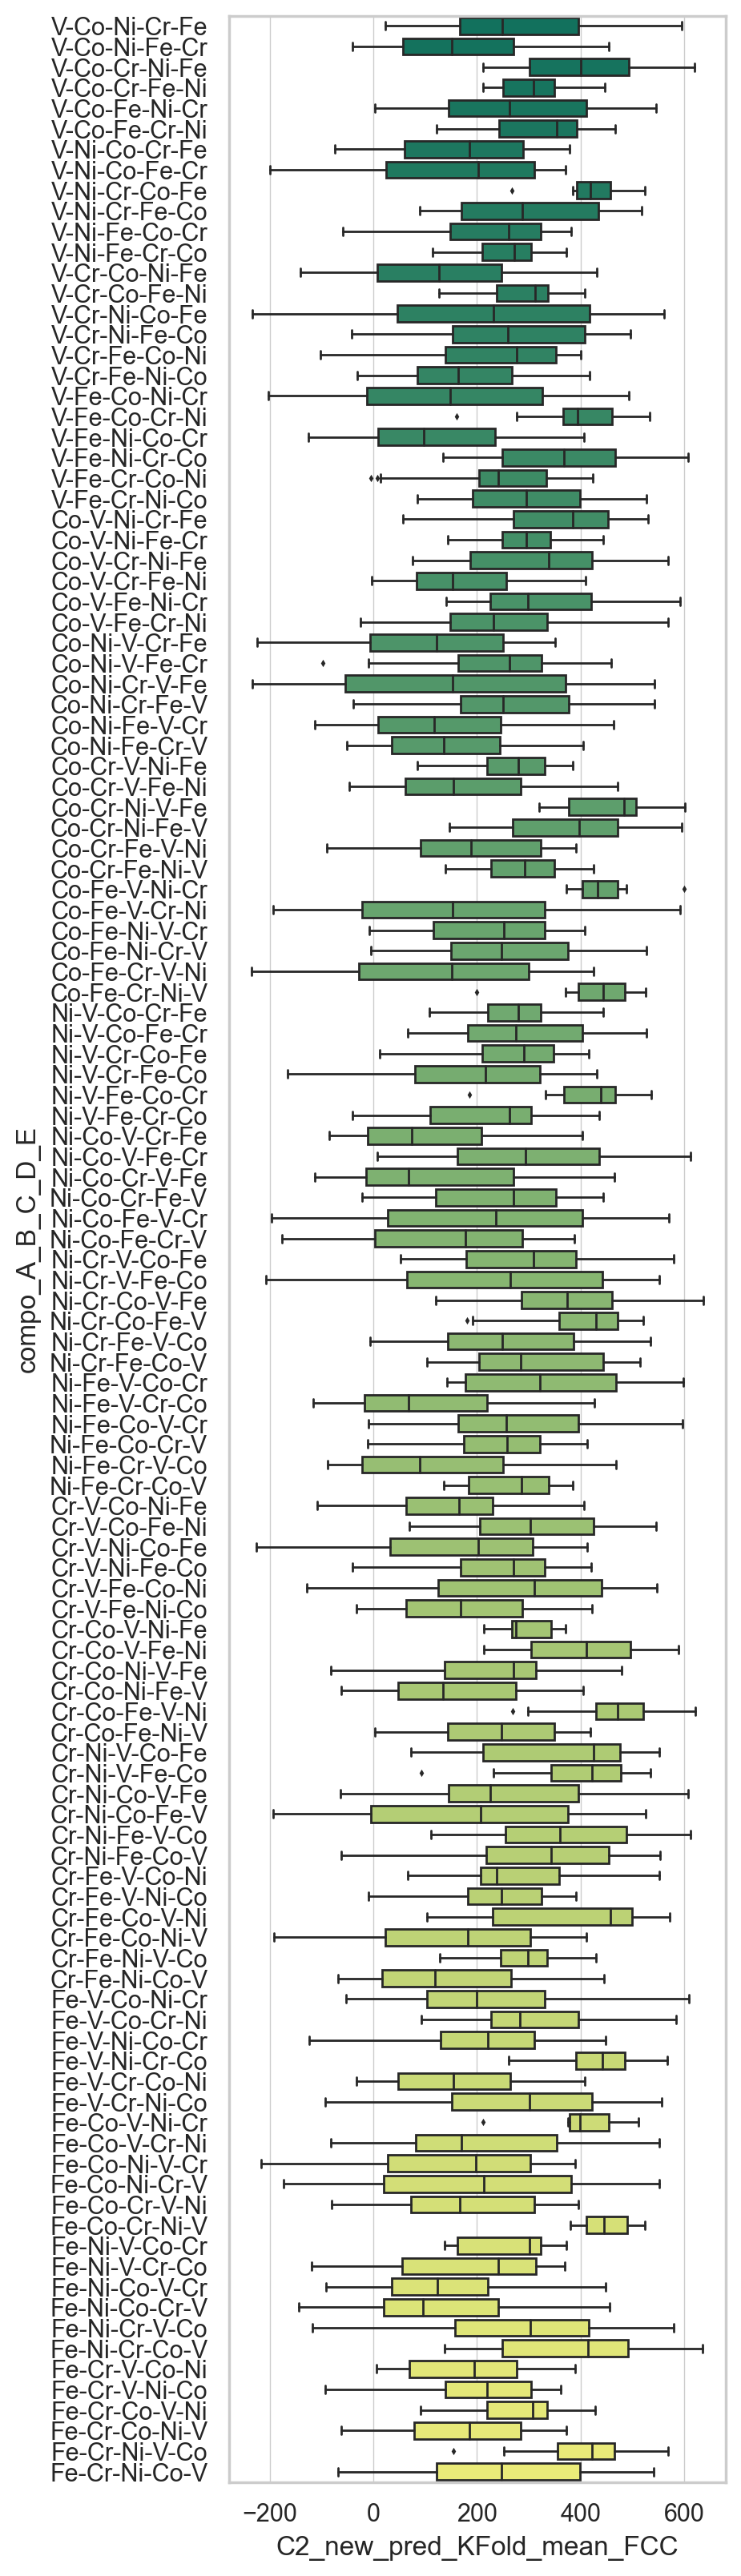

In [62]:
plt.subplots(ncols=1, figsize=(4, 20), dpi=200)
# sns.boxplot(x="sigma_SSS_FCC", y="compo_A_B_C_D_E", data=df_properties, linewidth=1, fliersize=1, palette="summer")
# sns.boxplot(x="H1_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", data=df_properties, linewidth=1, fliersize=1, palette="summer")
sns.boxplot(x="C2_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E",
            data=df_properties, linewidth=1, fliersize=1, palette="summer")

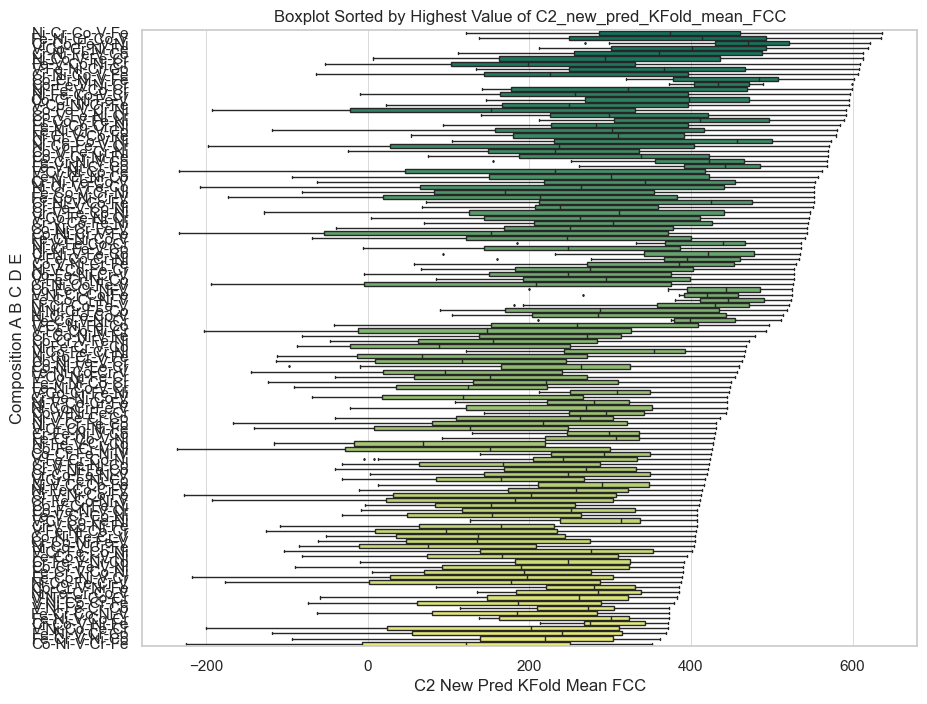

In [63]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
# df_properties = pd.read_csv('your_data.csv')

# Calculate the maximum value of 'C2_new_pred_KFold_mean_FCC' for each group of 'compo_A_B_C_D_E'
max_values = df_properties.groupby('compo_A_B_C_D_E')[
    'C2_new_pred_KFold_mean_FCC'].max()

# Sort the index (group names) by its values (maximum values)
sorted_groups = max_values.sort_values(ascending=False).index

# Now plot your boxplot with the sorted order
plt.figure(figsize=(10, 8))
sns.boxplot(x="C2_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", data=df_properties,
            linewidth=1, fliersize=1, palette="summer", order=sorted_groups)

# Set labels, title, etc.
plt.xlabel('C2 New Pred KFold Mean FCC')
plt.ylabel('Composition A B C D E')
plt.title('Boxplot Sorted by Highest Value of C2_new_pred_KFold_mean_FCC')

plt.show()

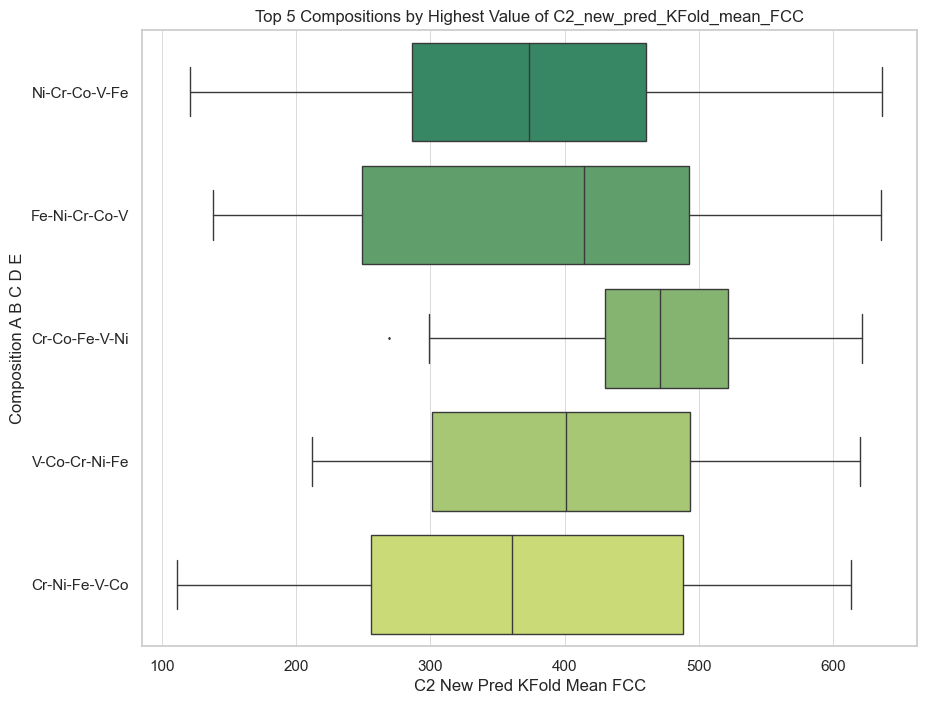

In [64]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_properties is your DataFrame and it's already loaded

# Calculate the maximum value of 'C2_new_pred_KFold_mean_FCC' for each 'compo_A_B_C_D_E'
C2_max_values = df_properties.groupby('compo_A_B_C_D_E')[
    'C2_new_pred_KFold_mean_FCC'].max()

# Sort the groups and get the top 5
C2_sorted_groups = C2_max_values.sort_values(ascending=False).head(5).index

# Now plot your boxplot with the top 5 sorted order
plt.figure(figsize=(10, 8))
sns.boxplot(x="C2_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", data=df_properties,
            linewidth=1, fliersize=1, palette="summer", order=C2_sorted_groups)

# Set labels, title, etc.
plt.xlabel('C2 New Pred KFold Mean FCC')
plt.ylabel('Composition A B C D E')
plt.title('Top 5 Compositions by Highest Value of C2_new_pred_KFold_mean_FCC')

plt.show()

In [54]:
stop

NameError: name 'stop' is not defined

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import os
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor
import matplotlib
matplotlib.rcParams['font.family'] = 'FreeSans'

calphad_results_dir = './v6_A-B-C-D-E_Sputtering/'
print("calphad results directory:", os.path.abspath(calphad_results_dir))

ML_results_dir = './v6_A-B-C-D-E_Sputtering_ML/v6_A-B-C-D-E_Sputtering_ML_All_Calc/'
print("")
print("ML results directory:", os.path.abspath(ML_results_dir))

### Creating lists of compositions and labels


In [ ]:
# Define the set of elements for D and E
set_D_E = [{'Co'}, {'V'}, {'Mn'}, {'Mo'}, {'Cu'},
           {'Nb'}, {'W'}, {'Ti'}, {'Al'}, {'Si'}, {'Ta'}]

# Generate all possible combinations of D and E
compo_D_E_list = list(combinations(set_D_E, 2))

compo_A_B_C_D_E_list = []
compo_A_B_C_D_E_label_list = []

for compo_D_E in compo_D_E_list:
    # Convert the current combination to a list and flatten it
    compo_D_E_list = [item for sublist in compo_D_E for item in sublist]

    # Define the current combination of A, B, C, D, E
    compo_A_B_C_D_E = ['Fe', 'Cr', 'Ni'] + compo_D_E_list
    compo_A_B_C_D_E_merge = '_'.join([*compo_A_B_C_D_E])

    compo_A_B_C_D_E_label_merge = '-'.join([*compo_A_B_C_D_E])
    compo_A_B_C_D_E_list.append(compo_A_B_C_D_E_merge)
    compo_A_B_C_D_E_label_list.append(compo_A_B_C_D_E_label_merge)

print("compo_A_B_C_D_E_list : ", compo_A_B_C_D_E_list[0])
print("compo_A_B_C_D_E_label_list: ", compo_A_B_C_D_E_label_list[0])

full_path = os.path.abspath(calphad_results_dir + 'v6_' +
                            compo_A_B_C_D_E_list[0] + '_Sputtering' + '/count_fcc_fractions_byPalette.xlsx')
print("Full path:", full_path)

### Reads in relevant data, performs data manipulations, and saves the updated dataframes to files


In [ ]:
# # Define a list of compositions to iterate over
# # compo_A_B_C_D_E_list = ['Fe_Cr_Ni_Mn_Ta', 'Fe_Cr_Ni_Mn_Ti', 'Fe_Cr_Ni_Mn_W']

# # Initialize lists to hold dataframes
# fcc_fractions_byPalette_list = []
# SSS_fcc_byCompo_list = []
# H1_C2_mean_std_fcc_byCompo_list = []


# def process_composition(compo_A_B_C_D_E_fname, compo_A_B_C_D_E_label):

#     # ----- read `count_fcc_fractions_byPalette` -----
#     # Read in the FCC phase stability dataframe and add composition label
#     fcc_fractions_byPalette = pd.read_excel(calphad_results_dir +
#                                             'v6_' + compo_A_B_C_D_E_fname + '_Sputtering' + '/count_fcc_fractions_byPalette.xlsx')
#     fcc_fractions_byPalette = fcc_fractions_byPalette.assign(
#         compo_A_B_C_D_E=compo_A_B_C_D_E_label)

#     # Add labels for FCC phase stability types
#     fcc_fractions_byPalette = fcc_fractions_byPalette.assign(
#         Gmin_FCC='min Gibbs energy')
#     fcc_fractions_byPalette = fcc_fractions_byPalette.assign(
#         eq_FCC='full equilibrium')

#     # Append the updated dataframe to the list
#     fcc_fractions_byPalette_list.append(fcc_fractions_byPalette)

#     # ----- Read `SSS_byCompo` and `count_fcc_fractions_byCompo` -----
#     # Read in the SSS and FCC fractions by composition dataframes
#     SSS_byCompo = pd.read_excel(calphad_results_dir +
#                                 'v6_' + compo_A_B_C_D_E_fname + '_Sputtering' + '/SSS_byCompo.xlsx')
#     fcc_fractions_byCompo = pd.read_excel(calphad_results_dir +
#                                           'v6_' + compo_A_B_C_D_E_fname + '_Sputtering' + '/count_fcc_fractions_byCompo.xlsx')

#     # Merge the two dataframes
#     SSS_fcc_byCompo = pd.concat([SSS_byCompo, fcc_fractions_byCompo[[
#                                 'Gmin_FCC', 'eq_FCC', 'Gmin_eq_FCC']]], axis=1)

#     # Create a new column 'sigma_SSS_FCC' for SSS values corresponding to FCC phase stability
#     SSS_fcc_byCompo['sigma_SSS_FCC'] = SSS_fcc_byCompo.loc[SSS_fcc_byCompo['Gmin_eq_FCC'] == 1, 'sigma_SSS']
#     SSS_fcc_byCompo = SSS_fcc_byCompo.assign(
#         compo_A_B_C_D_E=compo_A_B_C_D_E_label)

#     # Saving the new `SSS_FCC_byCompo.xlsx`
#     if os.path.exists(calphad_results_dir + 'v6_' + compo_A_B_C_D_E_fname + '_Sputtering' + '/SSS_FCC_byCompo.xlsx'):
#         print('SSS_FCC_byCompo.xlsx: File already exists.')
#     else:
#         SSS_fcc_byCompo.to_excel(calphad_results_dir +
#                                  'v6_' + compo_A_B_C_D_E_fname + '_Sputtering' + '/SSS_FCC_byCompo.xlsx', index=False)
#         print('Saving '+'v6_' + compo_A_B_C_D_E_fname +
#               '_Sputtering' + '/SSS_FCC_byCompo.xlsx')

#     # Append the updated dataframe to the list
#     SSS_fcc_byCompo_list.append(SSS_fcc_byCompo)

#     # ----------------------------------------------------------------------------------------------------
#     H1_C2_mean_std_fcc_byCompo = pd.read_excel(
#         ML_results_dir + 'v6_' + compo_A_B_C_D_E_fname + '_SSS_FCC_byCompo_wt_pct_ML.xlsx')

#     # Create a new column 'sigma_SSS_FCC' for SSS values corresponding to FCC phase stability
#     H1_C2_mean_std_fcc_byCompo['H1_new_pred_KFold_mean_FCC'] = H1_C2_mean_std_fcc_byCompo.loc[
#         H1_C2_mean_std_fcc_byCompo['Gmin_eq_FCC'] == 1, 'H1_new_pred_KFold_mean']
#     H1_C2_mean_std_fcc_byCompo['H1_new_pred_KFold_std_FCC'] = H1_C2_mean_std_fcc_byCompo.loc[
#         H1_C2_mean_std_fcc_byCompo['Gmin_eq_FCC'] == 1, 'H1_new_pred_KFold_std']
#     H1_C2_mean_std_fcc_byCompo['C2_new_pred_KFold_mean_FCC'] = H1_C2_mean_std_fcc_byCompo.loc[
#         H1_C2_mean_std_fcc_byCompo['Gmin_eq_FCC'] == 1, 'C2_new_pred_KFold_mean']
#     H1_C2_mean_std_fcc_byCompo['C2_new_pred_KFold_std_FCC'] = H1_C2_mean_std_fcc_byCompo.loc[
#         H1_C2_mean_std_fcc_byCompo['Gmin_eq_FCC'] == 1, 'C2_new_pred_KFold_std']

#     # Saving the excel: H1 C2 when FCC==1
#     if os.path.exists(ML_results_dir + 'v6_' + compo_A_B_C_D_E_fname + '_SSS_FCC_byCompo_wt_pct_ML_fcc.xlsx'):
#         print('SSS_FCC_byCompo_wt_pct_ML_fcc.xlsx: File already exists.')
#     else:
#         H1_C2_mean_std_fcc_byCompo.to_excel(
#             ML_results_dir + 'v6_' + compo_A_B_C_D_E_fname + '_SSS_FCC_byCompo_wt_pct_ML_fcc.xlsx')
#         print('Saving ' + 'v6_' + compo_A_B_C_D_E_fname +
#               '_SSS_FCC_byCompo_wt_pct_ML_fcc.xlsx')

#     # Append the updated dataframe to the list
#     H1_C2_mean_std_fcc_byCompo_list.append(H1_C2_mean_std_fcc_byCompo)

#     # Return your results
#     return fcc_fractions_byPalette, SSS_fcc_byCompo, H1_C2_mean_std_fcc_byCompo


# # Use ProcessPoolExecutor to run the loop in parallel
# with ProcessPoolExecutor() as executor:
#     results = list(tqdm(executor.map(process_composition, compo_A_B_C_D_E_list,
#                    compo_A_B_C_D_E_label_list), total=len(compo_A_B_C_D_E_list)))

# # Unpack the results into your lists
# for result in results:
#     fcc_fractions_byPalette_list.append(result[0])
#     SSS_fcc_byCompo_list.append(result[1])
#     H1_C2_mean_std_fcc_byCompo_list.append(result[2])

# # Display the first two rows of the loaded dataframes
# display(fcc_fractions_byPalette_list[0].head(2))
# display(SSS_fcc_byCompo_list[0].head(2))
# display(H1_C2_mean_std_fcc_byCompo_list[0].head(2))

### Rank the sequence of ABCDE by `Gmin_eq_FCC_max`


In [ ]:
# ----- rank by `Gmin_eq_FCC_mean`
# # Calculate the mean of the Gmin_eq_FCC_fraction for each set of data and rank them in descending order
# Gmin_eq_FCC_mean = [np.mean(fcc_fractions_byPalette['Gmin_eq_FCC_fraction'].values)
#                     for fcc_fractions_byPalette in fcc_fractions_byPalette_list]
# print(Gmin_eq_FCC_mean)

# ranked_indices = np.argsort(Gmin_eq_FCC_mean)[::-1]  # Sort in descending order

# Gmin_eq_FCC_mean_sort = [Gmin_eq_FCC_mean[i] for i in ranked_indices]  # Sort the mean values in the ranked order
# print(Gmin_eq_FCC_mean_sort)


# ----- rank by `Gmin_eq_FCC_max`
# Calculate the max of the Gmin_eq_FCC_fraction for each set of data and rank them in descending order
Gmin_eq_FCC_max = [np.max(fcc_fractions_byPalette['Gmin_eq_FCC_fraction'].values)
                   for fcc_fractions_byPalette in fcc_fractions_byPalette_list]
print(Gmin_eq_FCC_max)

ranked_indices = np.argsort(Gmin_eq_FCC_max)[::-1]  # Sort in descending order

# Sort the mean values in the ranked order
Gmin_eq_FCC_max_sort = [Gmin_eq_FCC_max[i] for i in ranked_indices]
print(Gmin_eq_FCC_max_sort)

# Sort the list of dataframes based on the ranked order of mean values
compo_A_B_C_D_E_sort_list = [compo_A_B_C_D_E_list[i] for i in ranked_indices]
print(compo_A_B_C_D_E_sort_list)

fcc_fractions_byPalette_sort_list = [
    fcc_fractions_byPalette_list[i] for i in ranked_indices]
SSS_fcc_byCompo_sort_list = [SSS_fcc_byCompo_list[i] for i in ranked_indices]

H1_C2_mean_std_fcc_byCompo_sort_list = [
    H1_C2_mean_std_fcc_byCompo_list[i] for i in ranked_indices]

### Modify the dataframe for plotting: `fcc_fractions_byPalette_sort_list`


In [ ]:
# Create an empty list to store the modified dataframes
df_fcc_byPalette_sns_new_list = []

# Loop over each dataframe in the list of sorted FCC fractions by palette
for df_fcc_byPalette_sns in fcc_fractions_byPalette_sort_list:

    # Select the desired columns for the first dataframe and rename the columns
    df_fcc_byPalette_sns1 = df_fcc_byPalette_sns[['ABCDE', 'Gmin_FCC_fraction', 'Gmin_FCC',
                                                  'Gmin_eq_FCC_fraction', 'compo_A_B_C_D_E']]
    df_fcc_byPalette_sns1 = df_fcc_byPalette_sns1.rename(
        columns={'Gmin_FCC': 'minG vs.full equil.'})
    df_fcc_byPalette_sns1 = df_fcc_byPalette_sns1.rename(
        columns={'Gmin_FCC_fraction': 'Gmin_vs_eq_FCC_fraction'})

    # Select the desired columns for the second dataframe and rename the columns
    df_fcc_byPalette_sns2 = df_fcc_byPalette_sns[['ABCDE', 'eq_FCC_fraction', 'eq_FCC',
                                                  'compo_A_B_C_D_E']]
    df_fcc_byPalette_sns2 = df_fcc_byPalette_sns2.rename(
        columns={'eq_FCC': 'minG vs.full equil.'})
    df_fcc_byPalette_sns2 = df_fcc_byPalette_sns2.rename(
        columns={'eq_FCC_fraction': 'Gmin_vs_eq_FCC_fraction'})

    # Concatenate the two dataframes vertically
    df_fcc_byPalette_sns_new = pd.concat(
        [df_fcc_byPalette_sns1, df_fcc_byPalette_sns2], axis=0)

    # Add the modified dataframe to the list
    df_fcc_byPalette_sns_new_list.append(df_fcc_byPalette_sns_new)

### Check dataframes to be plotted

- `df_fcc_sns`
- `df_fcc_sns_30`
- `df_SSS_sns`
- `df_SSS_sns_30`
- `df_H1_C2_sns`
- `df_H1_C2_sns_30`


In [ ]:
# Concatenate the modified dataframes in the list vertically to create a new dataframe
df_fcc_sns = pd.concat(df_fcc_byPalette_sns_new_list, axis=0)
df_fcc_sns_30 = pd.concat(df_fcc_byPalette_sns_new_list[0:30], axis=0)

# Concatenate the list of SSS dataframes vertically to create a new dataframe
df_SSS_sns = pd.concat(SSS_fcc_byCompo_sort_list, axis=0)
df_SSS_sns_30 = pd.concat(SSS_fcc_byCompo_sort_list[0:30], axis=0)

# Concatenate the list of H1_C2 dataframes vertically to create a new dataframe
df_H1_C2_sns = pd.concat(H1_C2_mean_std_fcc_byCompo_sort_list, axis=0)
df_H1_C2_sns_30 = pd.concat(H1_C2_mean_std_fcc_byCompo_sort_list[0:30], axis=0)

# Display the first row of the new SSS dataframe
display(df_fcc_sns.head(1))
display(df_SSS_sns.head(1))
display(df_H1_C2_sns.head(1))
display(df_H1_C2_sns.columns)

In [ ]:
df_SSS_sns_30.head()

### First 30 alloys by max FCC fraction per palette


In [ ]:


def sns_plot(df_fcc_sns_30, df_SSS_sns_30, df_H1_C2_sns_30, figsize=(8, 6), rotation=45, fig_name='sns_plot_30.pdf'):

    fig, axs = plt.subplots(ncols=5, figsize=figsize, dpi=200)
    sns.set_theme(style="whitegrid", rc={
                  "axes.grid": True, "grid.linewidth": 0.5})
    font_size = 8

    sns.violinplot(data=df_fcc_sns_30, x="Gmin_vs_eq_FCC_fraction", y="compo_A_B_C_D_E", hue="minG vs.full equil.",
                   split=True, inner="quart", linewidth=1,
                   palette={"min Gibbs energy": "m", "full equilibrium": "g"}, ax=axs[0])
    axs[0].set_title("Comparing minG\nvs. full equilibrium",
                     fontsize=font_size)
    axs[0].set_xlabel('FCC fraction (%)\nfor palette patches',
                      fontsize=font_size)
    axs[0].set_ylabel(None)
    axs[0].legend(fontsize=font_size-2, loc='lower right')
    axs[0].set_xlim([0, 100])
    axs[0].set_xticks(range(0, 101, 20))
    axs[0].tick_params(axis='x', rotation=rotation)
    axs[0].tick_params(axis='both', labelsize=font_size)

    sns.boxplot(data=df_fcc_sns_30, x="Gmin_eq_FCC_fraction", y="compo_A_B_C_D_E",
                linewidth=1, fliersize=1, ax=axs[1])  # palette="summer"
    axs[1].set_title("Combining minG\nvs. full equilibrium",
                     fontsize=font_size)
    axs[1].set_xlabel('FCC fraction (%)\nfor palette patches',
                      fontsize=font_size)
    axs[1].set_ylabel(None)
    axs[1].set_xlim([0, 80])
    axs[1].set_xticks(range(0, 81, 20))
    axs[1].set_yticklabels([])
    axs[1].tick_params(axis='x', rotation=rotation)
    axs[1].tick_params(axis='both', labelsize=font_size)

    sns.boxplot(data=df_SSS_sns_30, x="sigma_SSS_FCC", y="compo_A_B_C_D_E",
                linewidth=1, fliersize=1, ax=axs[2], palette="summer")
    axs[2].set_title(
        'Solid solution\nstrengthening\nby physical model', fontsize=font_size)
    axs[2].set_xlabel('Strength-FCC(MPa)', fontsize=font_size)
    axs[2].set_ylabel(None)
    axs[2].set_yticklabels([])
    axs[2].set_xlim([0, 1000])
    axs[2].set_xticks(range(0, 1001, 200))
    axs[2].tick_params(axis='x', rotation=rotation)
    axs[2].tick_params(axis='both', labelsize=font_size)

    sns.boxplot(data=df_H1_C2_sns_30, x="H1_new_pred_KFold_mean_FCC",
                y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[3], palette="summer")
    axs[3].set_title('Vickers Hardness\nby neural network', fontsize=font_size)
    axs[3].set_xlabel('Vickers Hardness-FCC', fontsize=font_size)
    axs[3].set_ylabel(None)
    axs[3].set_yticklabels([])
    axs[3].set_xticks(range(0, 601, 200))
    axs[3].set_xlim([100, 600])
    axs[3].tick_params(axis='x', rotation=rotation)
    axs[3].tick_params(axis='both', labelsize=font_size)

    sns.boxplot(data=df_H1_C2_sns_30, x="C2_new_pred_KFold_mean_FCC",
                y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[4], palette="flare_r")
    # sns.despine(left=True, ax=axs[2])
    axs[4].set_title(
        'Corrosion\npitting potential\nby neural network', fontsize=font_size)
    axs[4].set_xlabel('Pitting potential-FCC\n(mV vs. SCE)',
                      fontsize=font_size)
    axs[4].set_ylabel(None)
    axs[4].set_yticklabels([])
    axs[4].set_xticks(range(-400, 801, 200))
    axs[4].set_xlim([-400, 800])
    axs[4].tick_params(axis='x', rotation=rotation)
    axs[4].tick_params(axis='both', labelsize=font_size)

    plt.tight_layout()
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()

In [ ]:
sns_plot(df_fcc_sns_30, df_SSS_sns_30, df_H1_C2_sns_30,
         figsize=(8, 6), rotation=90, fig_name='sns_plot_30.pdf')

### All alloys by max FCC fraction per palette


In [ ]:
sns_plot(df_fcc_sns, df_SSS_sns, df_H1_C2_sns,
         figsize=(8, 9), rotation=90, fig_name='sns_plot_full.pdf')

In [ ]:
# import matplotlib
# matplotlib.rcParams['font.family'] = 'FreeSans'

# fig, axs = plt.subplots(ncols=4, figsize=(6, 5), dpi=200)
# sns.set_theme(style="whitegrid")
# font_size = 7

# sns.boxplot(data=df_H1_C2_sns_30, x="H1_new_pred_KFold_mean_FCC",
#             y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[0], palette="summer")
# # sns.despine(left=True, ax=axs[2])
# axs[0].set_title('Vickers Hardness by ANN: mean', fontsize=font_size)
# axs[0].set_xlabel('Vickers Hardness', fontsize=font_size)
# axs[0].set_ylabel(None)
# axs[0].set_yticklabels([])
# axs[0].set_xlim([0, 600])
# axs[0].tick_params(axis='both', labelsize=font_size)

# sns.boxplot(data=df_H1_C2_sns_30, x="H1_new_pred_KFold_std_FCC",
#             y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[1], palette="summer")
# # sns.despine(left=True, ax=axs[2])
# axs[1].set_title('Vickers Hardness by ANN: std', fontsize=font_size)
# axs[1].set_xlabel('Vickers Hardness', fontsize=font_size)
# axs[1].set_ylabel(None)
# axs[1].set_yticklabels([])
# axs[1].set_xlim([0, 300])
# axs[1].tick_params(axis='both', labelsize=font_size)

# sns.boxplot(data=df_H1_C2_sns_30, x="C2_new_pred_KFold_mean_FCC",
#             y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[2], palette="flare_r")
# # sns.despine(left=True, ax=axs[2])
# axs[2].set_title('Corrosion pitting potential by ANN: mean',
#                  fontsize=font_size)
# axs[2].set_xlabel('Pitting potential (mV vs SCE)', fontsize=font_size)
# axs[2].set_ylabel(None)
# axs[2].set_yticklabels([])
# axs[2].set_xlim([-300, 800])
# axs[2].tick_params(axis='both', labelsize=font_size)

# sns.boxplot(data=df_H1_C2_sns_30, x="C2_new_pred_KFold_std_FCC",
#             y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[3], palette="flare_r")
# # sns.despine(left=True, ax=axs[2])
# axs[3].set_title('Corrosion pitting potential by ANN: std', fontsize=font_size)
# axs[3].set_xlabel('Pitting potential (mV vs SCE)', fontsize=font_size)
# axs[3].set_ylabel(None)
# axs[3].set_yticklabels([])
# axs[3].set_xlim([0, 400])
# axs[3].tick_params(axis='both', labelsize=font_size)

# plt.tight_layout()
# # plt.savefig('sns_plot_30', bbox_inches='tight')
# plt.show()